In [4]:
from sktime.classification.kernel_based import RocketClassifier
import pandas as pd

In [23]:
from sktime.datasets import load_unit_test
from sktime.datasets import load_solar  
X_train, y_train = load_unit_test(split="train", return_X_y=True)
X_test, y_test = load_unit_test(split="test", return_X_y=True) 
clf = RocketClassifier(num_kernels=10000) 
clf.fit(X_train, y_train) 

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


RocketClassifier()

In [24]:
clf.get_fitted_params()

{'classes': array(['1', '2'], dtype='<U1'),
 'classifier': RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
        4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
        2.15443469e+02, 1.00000000e+03])),
 'fit_time': 17319,
 'n_classes': 2,
 'transformers': TransformerPipeline(steps=[Rocket(),
                            TabularToSeriesAdaptor(transformer=StandardScaler(with_mean=False))]),
 'transformers__steps': [('Rocket', Rocket()),
  ('TabularToSeriesAdaptor',
   TabularToSeriesAdaptor(transformer=StandardScaler(with_mean=False)))],
 'transformers__Rocket': Rocket(),
 'transformers__TabularToSeriesAdaptor': TabularToSeriesAdaptor(transformer=StandardScaler(with_mean=False)),
 'transformers__TabularToSeriesAdaptor__transformer': StandardScaler(with_mean=False),
 'transformers__TabularToSeriesAdaptor__transformer__mean': array([0.31875   , 1.75617815, 0.5125    , ..., 2.90006064, 0.7625    ,
        2.59405302]),
 'tr

In [25]:
y_pred = clf.predict(X_test) 

In [26]:
clf.score(X_test,y_test)

0.9090909090909091

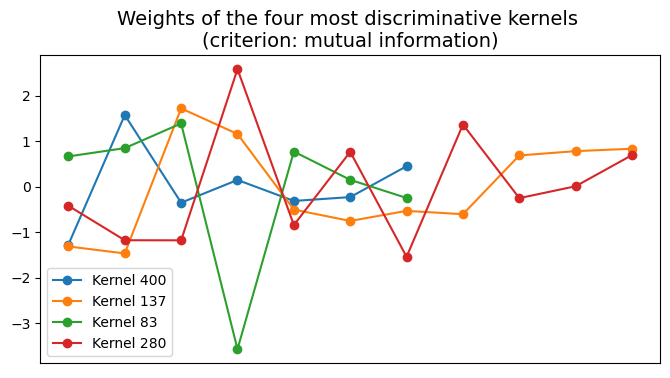

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.transformation import ROCKET
from sklearn.feature_selection import mutual_info_classif

# Toy dataset
X, _, y, _ = load_gunpoint(return_X_y=True)

# ROCKET transformation
rocket = ROCKET(n_kernels=500, random_state=42)
X_rocket = rocket.fit_transform(X)

# Find the most discriminative kernels
n_kernels = 4
mutual_info = mutual_info_classif(X_rocket, y, random_state=42)
indices = np.floor_divide(np.argsort(mutual_info), 2)[-n_kernels:]

# Visualize the weights of the most discriminative kernels
plt.figure(figsize=(8, 4))
for idx in indices:
    plt.plot(rocket.weights_[idx, :rocket.length_[idx]], 'o-',
             label='Kernel {}'.format(idx))
plt.legend(loc='best')
plt.title('Weights of the four most discriminative kernels \n'
          '(criterion: mutual information)', fontsize=14)
plt.xticks([])
plt.show()

In [17]:
X_rocket

array([[3.69357056, 0.74      , 2.92046416, ..., 0.62666667, 2.87453507,
        0.32727273],
       [3.8059886 , 0.74666667, 2.64568633, ..., 0.63333333, 2.82079044,
        0.34545455],
       [3.78048032, 0.72      , 2.78008925, ..., 0.64      , 2.7312106 ,
        0.42727273],
       ...,
       [4.9017301 , 0.73333333, 6.39011076, ..., 0.63333333, 4.5492738 ,
        0.35454545],
       [3.85454886, 0.73333333, 3.04534841, ..., 0.63333333, 3.05313345,
        0.41818182],
       [3.91878714, 0.69333333, 2.63377687, ..., 0.74      , 2.70358426,
        0.15454545]])

In [9]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline

from sktime.datasets import load_arrow_head  # univariate dataset
from sktime.datasets import load_basic_motions  # multivariate dataset
from sktime.transformations.panel.rocket import Rocket

In [29]:
X_train, y_train = load_basic_motions(split="train", return_X_y=True)

In [30]:
rocket = Rocket()
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

In [57]:
X_train_transform

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.403846,6.594392,0.41,20.464489,0.107143,8.995880,0.49,11.077009,0.833333,3.099194,...,0.769231,3.718859,0.61,10.914900,0.433333,10.226504,0.32,10.886617,0.416667,5.199807
1,0.250000,12.018789,0.28,25.125986,0.107143,1.678857,0.42,16.100082,0.700000,1.299394,...,0.961538,2.131061,0.71,11.833123,0.488889,12.447055,0.28,7.841293,0.233333,4.420570
2,0.423077,9.515649,0.49,17.928890,0.392857,4.444518,0.59,6.789845,0.666667,6.797754,...,0.846154,2.525552,0.49,11.821667,0.477778,5.273335,0.41,6.457534,0.500000,6.915552
3,0.461538,10.861681,0.46,9.923163,0.357143,8.312949,0.49,8.419594,0.566667,5.724053,...,0.596154,5.274454,0.59,9.360005,0.455556,6.804664,0.43,6.827634,0.433333,6.784356
4,0.288462,10.557179,0.53,15.624452,0.500000,7.190917,0.46,11.257201,0.533333,6.653256,...,0.788462,3.035833,0.63,13.548368,0.444444,5.568461,0.41,7.607885,0.466667,6.589044
5,0.442308,4.866357,0.34,26.465355,0.357143,6.957520,0.46,7.064989,0.633333,4.895213,...,0.903846,2.105347,0.68,8.525061,0.377778,7.910294,0.28,12.634871,0.366667,3.249572
6,0.384615,8.890086,0.38,10.446960,0.428571,6.754973,0.50,11.485286,0.866667,4.923035,...,0.653846,4.628464,0.70,12.252307,0.377778,8.053219,0.31,9.479474,0.366667,6.769578
7,0.480769,9.513924,0.43,8.458977,0.428571,10.334537,0.49,7.833060,0.566667,4.977114,...,0.653846,4.355732,0.58,7.628748,0.477778,5.263808,0.47,7.256515,0.433333,4.685521
8,0.461538,7.650220,0.47,11.521561,0.321429,5.928819,0.47,10.140874,0.500000,6.129087,...,0.769231,3.672113,0.63,12.286139,0.366667,8.080836,0.35,7.897473,0.466667,2.280436
9,0.442308,11.155920,0.35,15.908724,0.357143,4.787786,0.49,13.347384,0.833333,4.689002,...,0.807692,3.996231,0.69,10.852779,0.466667,9.920604,0.31,11.142470,0.383333,6.106884


In [31]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))

In [32]:
X_test, y_test = load_basic_motions(split="test", return_X_y=True)
X_test_transform = rocket.transform(X_test)

In [33]:
classifier.score(X_test_transform, y_test)

0.975

#### Testing with the alcohol dataset

In [20]:
from sktime.datatypes import get_examples

In [2]:
alcohol_data=pd.read_csv("non_alc_curves.csv")
# alcohol_data['time'] = alcohol_data.groupby('Sample_ID').cumcount()

In [46]:
X = alcohol_data[alcohol_data["Sample_ID"]==1].loc[:, 'ID':'Sample_ID']
y = alcohol_data[['Target']]

## Split 1
X_train = X[alcohol_data['split1'] == 'train']
X_test = X[alcohol_data['split1'] == 'val']
y_train = y[alcohol_data['split1'] == 'train']
y_test = y[alcohol_data['split1'] == 'val']

/var/folders/kf/td7j4pms337by229lpg8vb3m0000gn/T/ipykernel_24127/3689101515.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train = X[alcohol_data['split1'] == 'train']
/var/folders/kf/td7j4pms337by229lpg8vb3m0000gn/T/ipykernel_24127/3689101515.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test = X[alcohol_data['split1'] == 'val']


In [35]:
X_train.index

Int64Index([  3600,   3601,   3602,   3603,   3604,   3605,   3606,   3607,
              3608,   3609,
            ...
            399590, 399591, 399592, 399593, 399594, 399595, 399596, 399597,
            399598, 399599],
           dtype='int64', length=270000)

In [4]:
### Function to check and trim data for samples that are too long/short
def check_and_trim(df):
    # Define the desired size per group
    desired_size = 3600

    # Create an empty DataFrame to hold the trimmed data
    trimmed_df = pd.DataFrame()

    # Group the dataframe by 'Full_Sample_ID' and iterate over the groups
    for full_sample_id, group in df.groupby('Full_Sample_ID'):
        # If the size of the group is larger than the desired size, take the first 'desired_size' rows
        if len(group) > desired_size:
            group = group.iloc[:desired_size]
        # Append the group to the trimmed dataframe
        trimmed_df = pd.concat([trimmed_df, group], ignore_index=True)

    return trimmed_df

In [5]:
## For reproducibility
import os
import pandas as pd
import warnings
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sktime
import sklearn
import torch
torch.manual_seed(111)  

## Get file names
root = '.'
# files = os.listdir(root) ## For everything
files = ['non_alc_curves.csv'] 

## Set up lists
# pred_vars = ['Full_Sample_ID', 'Brake','Accel', 'Lat_Pos', 'Speed', 'Heading', 'Wheel_Rate']
# x_vars = ['Brake','Accel', 'Lat_Pos', 'Speed', 'Heading', 'Wheel_Rate']
y_vars = ['Target','Full_Sample_ID']
x_vars = ['Lat_Pos', 'Speed']  ## Reduced set of X-vars
pred_vars = ['Full_Sample_ID', 'Lat_Pos', 'Speed'] ## Reduced set of X-vars
split_names = ['split1','split2','split3','split4','split5','split6','split7','split8','split9','split10']

###  Outer Loop through diff experiments
for cur_file in files:
    data = pd.read_csv(root + '/' + cur_file)
    data = data.rename(columns={'CFS.Brake.Pedal.Force': 'Brake', 
                         'CFS.Accelerator.Pedal.Position': 'Accel', 
                         'SCC.Lane.Deviation.2': 'Lat_Pos',
                        'VDS.Veh.Heading.Fixed': 'Heading',
                        'VDS.Veh.Speed': 'Speed',
                        'CFS.Steering.Wheel.Angle': 'Wheel_Angle',
                        'CFS.Steering.Wheel.Angle.Rate': 'Wheel_Rate'})
    
    ## File where where results will be stored
    res_file = cur_file.strip('.csv') + '_rawpreds.csv'

    ### Inner loop through diff validation sets
    ict_res_df = pd.DataFrame(columns = ['val_split','sample_ID','pos_class_proba','target'])
    for sp in split_names:
        train_y = data.loc[data[sp] == 'train'][y_vars]
        train_X = check_and_trim(data.loc[data[sp] == 'train'][pred_vars]).iloc[1::6, :]
        # train_X = check_and_trim(data.loc[data[sp] == 'train'][pred_vars])
        test_y = data.loc[data[sp] == 'val'][y_vars]
        # test_X = check_and_trim(data.loc[data[sp] == 'val'][pred_vars])
        test_X = check_and_trim(data.loc[data[sp] == 'val'][pred_vars]).iloc[1::6, :]
        
        ## Reformat data in 3-d arrays suitable for inception time/rocket
        train_X_array = np.zeros(shape = (train_X['Full_Sample_ID'].nunique(), len(pred_vars) - 1, 
                                          int(train_X.shape[0]/train_X['Full_Sample_ID'].nunique())))
        train_y_small = np.zeros(shape = (train_X['Full_Sample_ID'].nunique()))

        test_X_array = np.zeros(shape = (test_X['Full_Sample_ID'].nunique(), len(pred_vars) - 1, 
                                         int(test_X.shape[0]/test_X['Full_Sample_ID'].nunique())))
        test_y_small = np.zeros(shape = (test_X['Full_Sample_ID'].nunique()))

        id_list = train_X['Full_Sample_ID'].unique()
        i = 0
        for cur_id in id_list:
            ji = 0
            for j in x_vars:
                train_X_array[i,ji,:] = train_X.loc[train_X['Full_Sample_ID'] == cur_id][j]
                ji=ji+1
            train_y_small[i] = train_y.loc[train_y['Full_Sample_ID'] == cur_id]['Target'].unique()
            i=i+1

        test_id_list = test_X['Full_Sample_ID'].unique()
        i = 0
        for cur_id in test_id_list:
            ji = 0
            for j in x_vars:
                test_X_array[i,ji,:] = test_X.loc[test_X['Full_Sample_ID'] == cur_id][j]
                ji=ji+1
            test_y_small[i] = test_y.loc[test_y['Full_Sample_ID'] == cur_id]['Target'].unique()
            i=i+1
            

NameError: name 'check_and_trim' is not defined

In [7]:
from sklearn.model_selection import GridSearchCV
from sktime.transformations.panel.rocket import Rocket

# Define hyperparameter grid
param_grid = {
    'num_kernels': [10000, 20000, 30000],
    "random_state":["None","int"]
}


rocket = Rocket()

grid_search = GridSearchCV(estimator=rocket, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_X_array)

best_params = grid_search.best_params_
best_rocket = Rocket(**best_params)
best_rocket_fit=best_rocket.fit(train_X_array)
X_train_transform = best_rocket_fit.transform(train_X_array)

NameError: name 'train_X_array' is not defined

In [3]:
best_rocket.kernels

NameError: name 'best_rocket' is not defined

In [9]:
sum=0
for i in range(len(best_rocket.kernels)):
    sum+=len(best_rocket.kernels[0])
print(sum)


864269


In [6]:
kernelss=best_rocket_fit.kernels[0]
print(kernelss)

NameError: name 'best_rocket_fit' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt


for i in range(30):
    for j in range(7):        
        sample_series_index = i  # Replace with the appropriate index of the time series in train_X_array
        sample_series = train_X_array[sample_series_index].flatten()  # Flatten to ensure one-dimensional array

        kernel_index = j  # Choose the index of the kernel you want to visualize
        kernel = kernelss[kernel_index].flatten()  

        # Apply the kernel to the sample time series
        output = np.convolve(sample_series, kernel, mode='valid')

        # Compute the gradient of the output with respect to the input
        gradient = np.gradient(output)

        # Visualize the saliency map
        plt.figure(figsize=(10, 4))
        plt.plot(sample_series, color='blue', label='Input Time Series')
        plt.plot(output, color='red', label='Output of Kernel')
        plt.plot(gradient, color='green', label='Saliency Map')
        plt.legend()
        plt.title('Saliency Map Visualization')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.show()


NameError: name 'train_X_array' is not defined

In [331]:
sample_series

array([-1.45854771, -1.42521966, -1.41229498, ..., 67.43712616,
       67.40776825, 67.37828827])

In [313]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier.fit(X_train_transform, train_y_small)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))

In [264]:
X_test_transform = best_rocket.transform(test_X_array)
classifier.score(X_test_transform, test_y_small)

0.5405405405405406

Tracing back the coefficients for the given features

In [265]:
coeff=[]
feature=[]

for i in range(classifier.coef_.size):
    coeff.append(classifier.coef_[0,i])
    feature.append(i+1)
ridge_coefficients=pd.DataFrame(data={"coeff":coeff,"kernel":feature},index=range(1,20001))
ridge_coefficients.index.names=['feature']


In [266]:
ridge_coefficients["kernel"]=np.ceil(ridge_coefficients["kernel"]/2)

In [267]:
ridge_coefficients

,coeff,kernel
feature,,
1,0.000023,1.0
2,0.000494,1.0
3,0.000098,2.0
4,0.001026,2.0
5,-0.000010,3.0
...,...,...
19996,-0.001993,9998.0
19997,-0.000003,9999.0
19998,-0.000152,9999.0


Top 5 most influential features

In [268]:
ridge_coefficients.sort_values(by="coeff",key=abs,ascending=False).head(n=5)

,coeff,kernel
feature,,
13372,0.005124,6686.0
10724,-0.004953,5362.0
8380,-0.004709,4190.0
5274,0.004584,2637.0
8692,0.004410,4346.0


In [269]:
feature_index=ridge_coefficients.sort_values(by="coeff",key=abs,ascending=False).head(n=5).index+1

In [260]:
X_train_transform

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.633333,6.230210,0.413333,7.444666,0.241667,3.693005,0.455000,9.631480,0.678922,10.215519,...,0.350000,11.900426,0.745000,7.757304,0.421667,12.803744,0.275794,11.673244,0.836667,9.275768
1,0.701667,6.332907,0.456667,10.418976,0.333333,2.785106,0.430000,6.634078,0.600490,4.804565,...,0.471667,6.268830,0.610000,4.844764,0.415000,4.850751,0.337302,4.844917,0.793333,1.980506
2,0.620000,4.425702,0.441667,4.714696,0.000000,-2.328327,0.451667,4.266638,0.637255,3.963855,...,0.365000,3.293563,0.740000,3.129376,0.466667,1.309092,0.363095,4.376990,0.840000,1.806260
3,0.661667,5.549871,0.476667,9.173750,0.516667,3.549472,0.475000,5.917453,0.644608,5.842885,...,0.408333,10.077349,0.671667,4.456021,0.423333,1.686776,0.307540,6.779202,0.758333,2.206982
4,0.668333,2.231631,0.431667,7.414009,0.583333,8.342295,0.476667,9.514184,0.705882,8.763475,...,0.375000,11.847918,0.678333,9.116982,0.411667,11.244985,0.333333,8.310846,0.895000,13.634900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.703333,5.069029,0.380000,6.338768,0.175000,3.855084,0.450000,7.026972,0.870098,4.821434,...,0.351667,5.481633,0.671667,3.684372,0.356667,2.938199,0.255952,5.919565,0.856667,2.401441
71,0.631667,2.725764,0.445000,4.510569,0.450000,3.985365,0.498333,5.534002,0.727941,5.837493,...,0.313333,4.633109,0.738333,4.036959,0.423333,1.620452,0.303571,3.972419,0.818333,4.254509
72,0.610000,2.701774,0.386667,4.037662,0.691667,2.725181,0.535000,6.614996,0.561275,5.122239,...,0.391667,3.374835,0.718333,4.800798,0.418333,4.295629,0.230159,2.154601,0.858333,4.591474
73,0.526667,3.725919,0.510000,7.482773,0.458333,4.144083,0.518333,6.766213,0.700980,4.529051,...,0.423333,4.394356,0.675000,3.683780,0.461667,2.764543,0.400794,3.411166,0.915000,1.591745


In [276]:
X_train_transform

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.535000,9.569180,0.389583,9.569977,0.621818,2.102956,0.687500,10.608013,0.154762,7.411667,...,0.866071,6.343158,0.026667,0.223379,0.481667,18.317928,0.751838,5.355288,0.375000,1.570869
1,0.615000,5.317005,0.443750,4.274724,0.752727,4.863608,0.638393,5.678114,0.185374,1.208319,...,0.383929,7.694098,0.023333,10.331278,0.641667,14.498580,0.667279,2.996512,0.622768,2.373254
2,0.556667,4.835729,0.370833,2.193415,0.683636,3.484371,0.825893,7.122875,0.052721,0.334852,...,0.303571,4.295020,0.118333,0.995903,0.463333,10.918392,0.738971,3.250587,0.546875,3.356561
3,0.523333,8.688960,0.443750,6.303723,0.756364,2.716411,0.491071,4.662663,0.221088,2.121338,...,0.803571,9.255070,0.038333,2.342699,0.423333,7.645364,0.593750,4.018771,0.417411,1.069528
4,0.606667,6.765390,0.325000,7.538267,0.581818,2.802706,0.290179,4.822676,0.079932,11.645020,...,0.580357,10.331782,0.000000,-0.241850,0.445000,11.429399,0.751838,4.692938,0.424107,2.704149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.670000,5.415458,0.408333,4.356000,0.756364,2.979828,0.540179,5.310009,0.112245,1.006454,...,1.000000,11.100801,0.043333,2.464807,0.313333,7.529571,0.772059,2.264531,0.473214,2.276715
71,0.628333,5.130129,0.347917,4.554903,0.643636,3.295916,0.540179,3.862813,0.103741,1.159396,...,0.937500,4.748630,0.041667,0.139075,0.488333,8.375583,0.715074,2.130709,0.334821,2.492621
72,0.548333,6.183612,0.302083,4.364266,0.618182,3.611836,0.000000,-0.838399,0.045918,0.360550,...,0.000000,-2.107013,0.000000,-0.263614,0.493333,11.287263,0.698529,2.545208,0.395089,3.769838
73,0.641667,5.464265,0.452083,3.221450,0.554545,4.228849,0.660714,6.615883,0.171769,0.440504,...,0.723214,1.130769,0.030000,0.607413,0.488333,7.726877,0.718750,2.260694,0.430804,3.540423


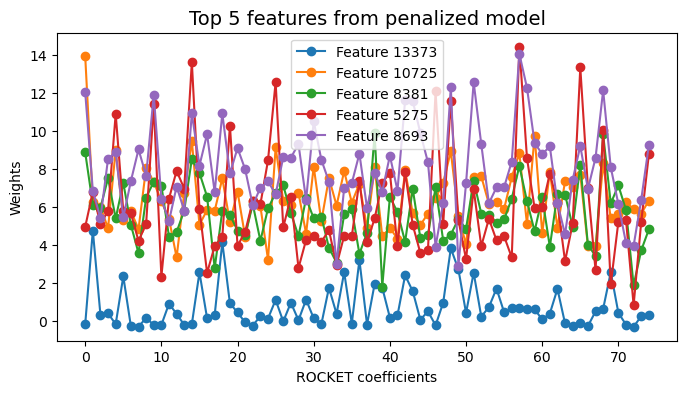

In [275]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
for i in feature_index:
    plt.plot(X_train_transform[i], 'o-', label='Feature {}'.format(i))
plt.legend(loc='best')
plt.title('Top 5 features from penalized model', fontsize=14)
plt.xlabel('ROCKET coefficients')
plt.ylabel('Weights')
plt.show()
